# **Problem Statement:**

Aerofit seeks to optimize its treadmill product recommendations by identifying unique customer profiles for each variant. Utilizing descriptive analytics and contingency tables, the market research team aims to unveil crucial insights into customer preferences and demographics. The objective is to enable Aerofit to offer personalized recommendations, enhancing customer satisfaction and driving business growth in the competitive fitness equipment market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'
output = 'aerofit.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit.csv
100%|██████████| 7.28k/7.28k [00:00<00:00, 16.1MB/s]


'aerofit.csv'

# 1. **Load the dataset**

In [3]:
df = pd.read_csv('aerofit.csv')

# 2. **Understanding the data**

In [4]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.shape

(180, 9)

In [8]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
for i in df.columns :
  print(f'{i} => {df[i].unique()}\n-------------***************-----------------\n')

Product => ['KP281' 'KP481' 'KP781']
-------------***************-----------------

Age => [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
-------------***************-----------------

Gender => ['Male' 'Female']
-------------***************-----------------

Education => [14 15 12 13 16 18 20 21]
-------------***************-----------------

MaritalStatus => ['Single' 'Partnered']
-------------***************-----------------

Usage => [3 2 4 5 6 7]
-------------***************-----------------

Fitness => [4 3 2 1 5]
-------------***************-----------------

Income => [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  9

In [10]:
df.ndim

2

# 3. **Checking for outliers**

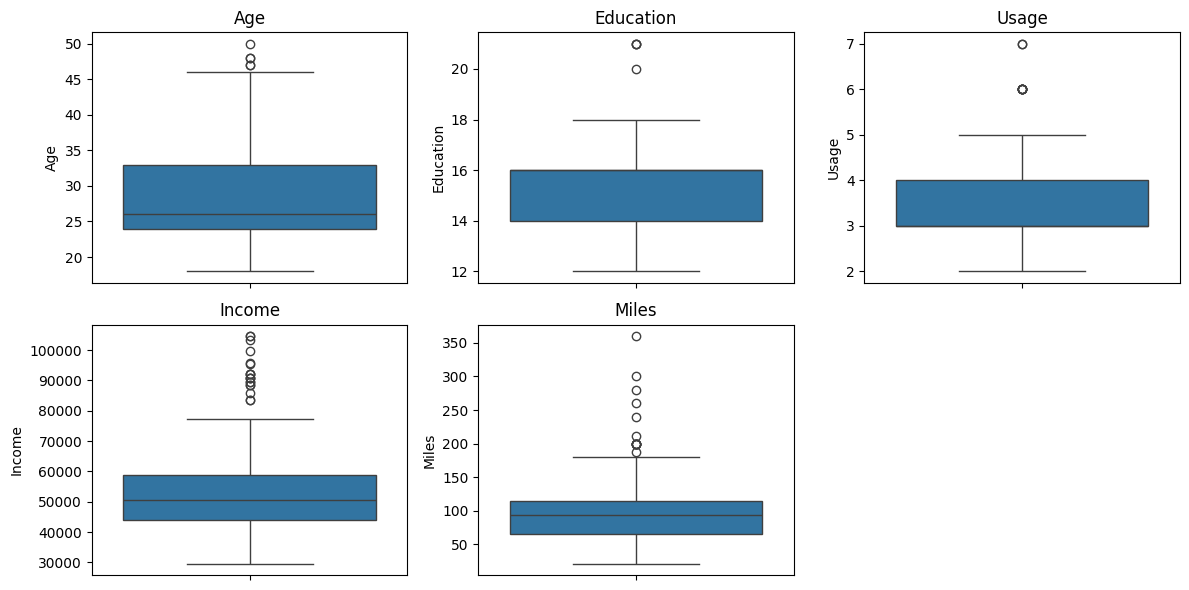

In [11]:
# Selecting only continuous variables
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Miles']

# Plot boxplots for continuous variables to detect outliers
plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

# 4. Treating Outliers

In [12]:
# Remove or clip outliers between 5th and 95th percentiles
for var in continuous_vars:
    lower_bound = np.percentile(df[var], 5)
    upper_bound = np.percentile(df[var], 95)
    df[var] = np.clip(df[var], lower_bound, upper_bound)

In [13]:
df['Usage'] = df['Usage'].astype(int)

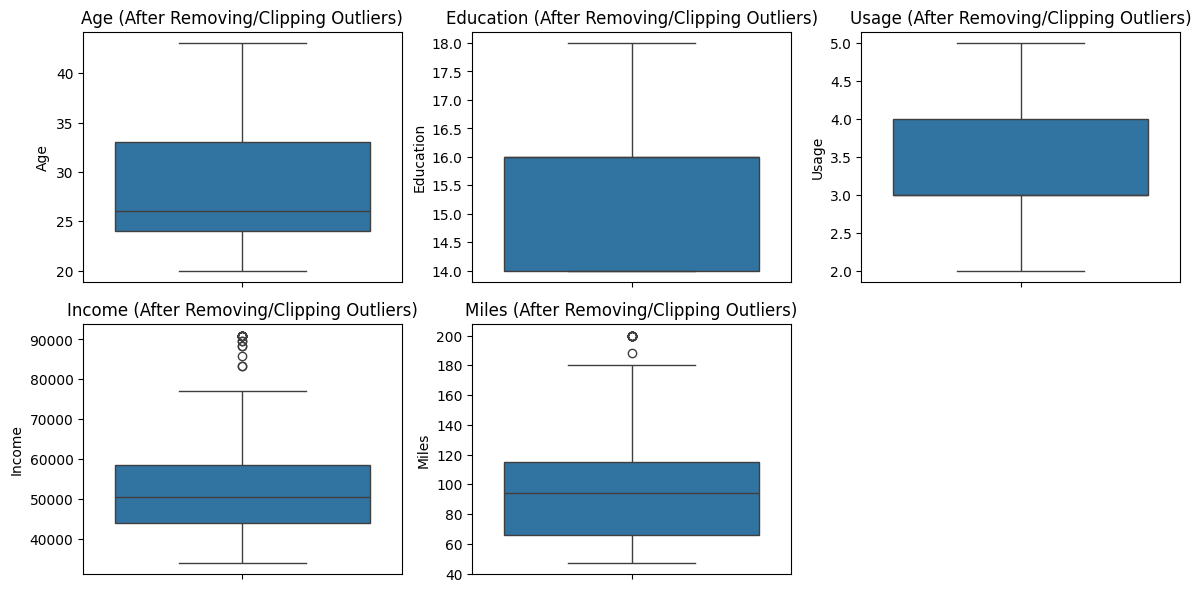

In [14]:
# Verify the removal/clipping of outliers
plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df[var])
    plt.title(var + " (After Removing/Clipping Outliers)")
plt.tight_layout()
plt.show()

# 5. Analysing the data

In [15]:
bins = [10,20,30,40,50]
labels = ['10-20','20-30','30-40','40-50']
df['Age_cat'] = pd.cut(df['Age'],bins = bins,labels = labels)
df['Age_cat']

0      10-20
1      10-20
2      10-20
3      10-20
4      10-20
       ...  
175    30-40
176    40-50
177    40-50
178    40-50
179    40-50
Name: Age_cat, Length: 180, dtype: category
Categories (4, object): ['10-20' < '20-30' < '30-40' < '40-50']

[3 2 4 5]


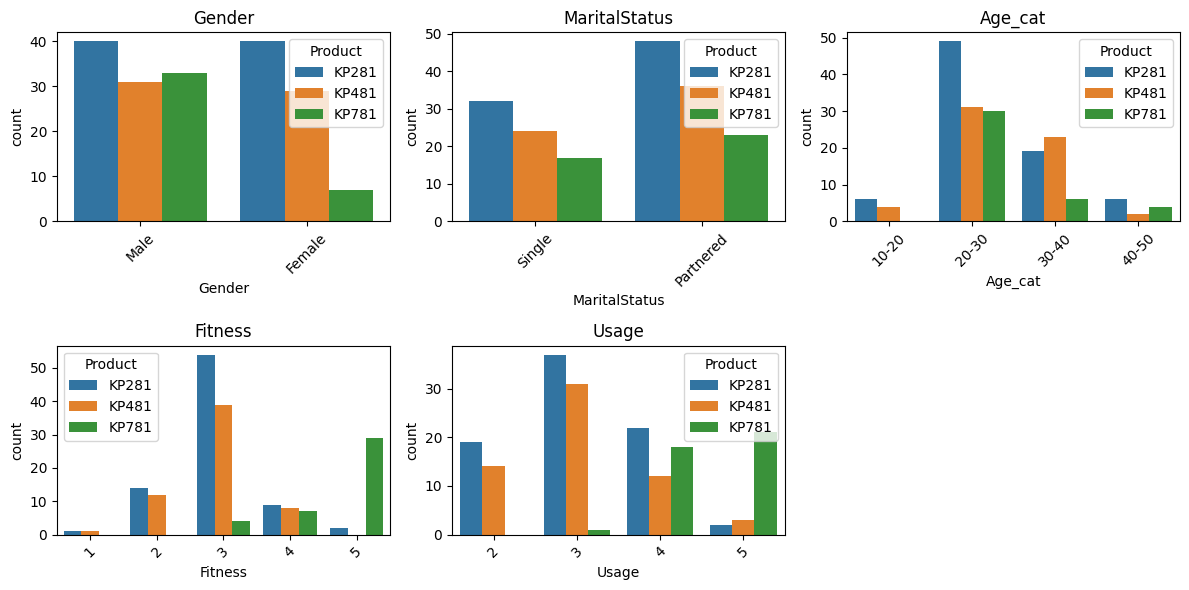

In [16]:
# Selecting only categorical variables
categorical_vars = ['Gender','MaritalStatus','Age_cat','Fitness','Usage']
print(df['Usage'].unique())
# Plot countplot for categorical variables to detect outliers
plt.figure(figsize=(12, 6))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x = var, hue = 'Product')
    plt.title(var)
    plt.xticks(rotation=45)
    # if(var == categorical_vars[-1]):
    #   plt.xticks(np.round(np.linspace(min(df[var]), max(df[var]), num=5), 2))
plt.tight_layout()
plt.show()



*   Very few Females buy **KP781** machine in comparison to males.
*   Partnered People prefer more **KP281** and **KP481** than single people.
*   Age group between 20-30 buys more KP281.
*   People who rate themselves as **3** on scale of **5** in terms of fitness tends to buy **KP281** and **KP481** whereas People who rates them as **5** prefer **KP781**.
*   People who buys **KP281** and **KP481** tends to use it **2-4 times** a week.
*   People who buys **KP781** tends to use it **4-5 times** a week.







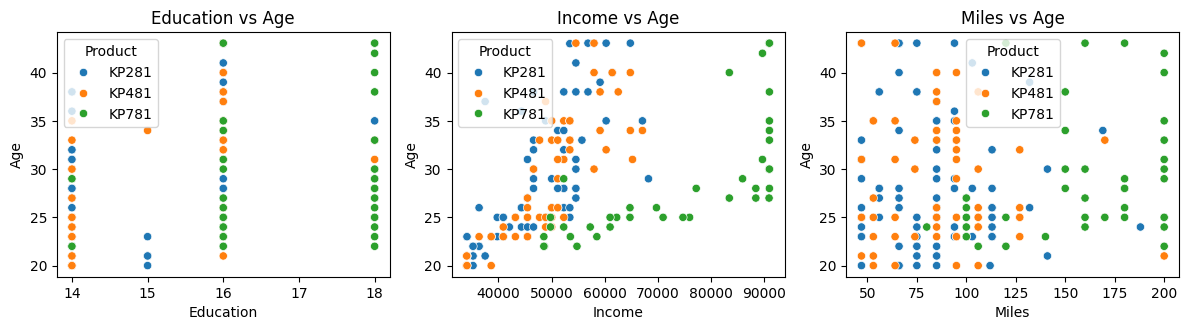

In [17]:
# Selecting only continuous variables
continuous_vars = ['Education', 'Income', 'Miles']

# Plot boxplots for continuous variables to detect outliers
plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x = var, y = 'Age', hue = 'Product')
    plt.title(f'{var} vs Age')
plt.tight_layout()
plt.show()

*   Highly Educated people prefer **KP781**.
*   People between the age 20-30 and Income between 50k-70k prefers to buy KP781 whereas people from all age who have Income greater than 70k buys KP781
*   People who runs below 125 miles prefers to buy KP481 and KP281.
*   People who runs above 125 miles buys KP781.





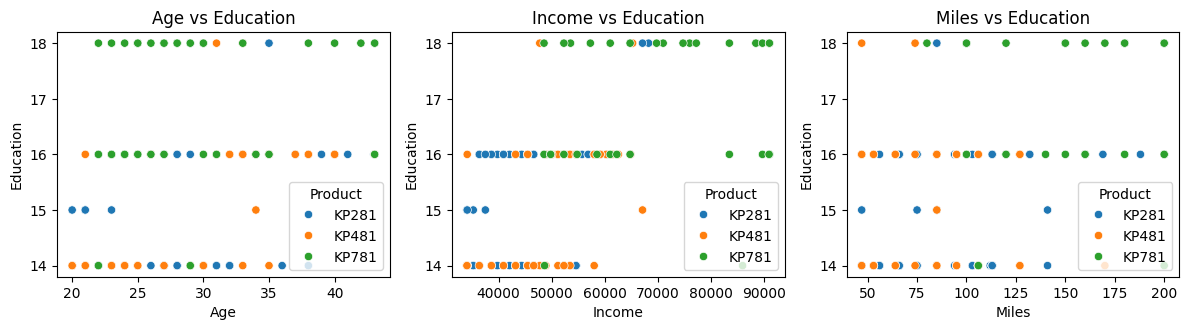

In [18]:
# Selecting only continuous variables
continuous_vars = ['Age', 'Income', 'Miles']

# Plot boxplots for continuous variables to detect outliers
plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x = var, y = 'Education', hue = 'Product')
    plt.title(f'{var} vs Education')
plt.tight_layout()
plt.show()

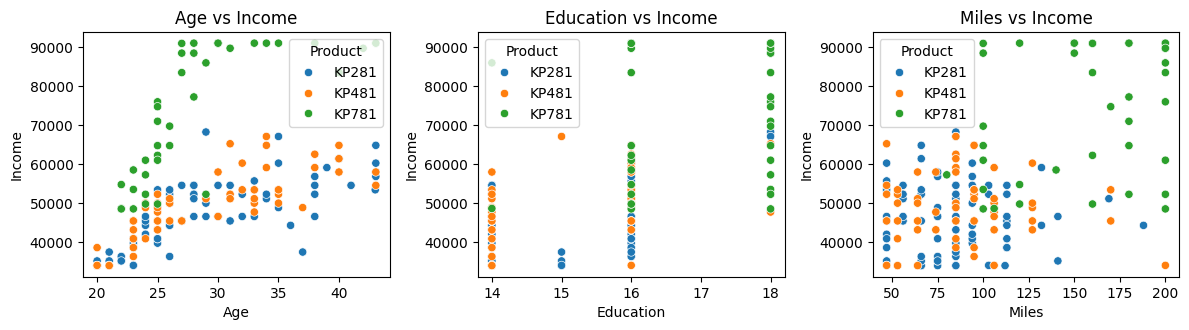

In [19]:
# Selecting only continuous variables
continuous_vars = ['Age', 'Education', 'Miles']

# Plot boxplots for continuous variables to detect outliers
plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x = var, y = 'Income', hue = 'Product')
    plt.title(f'{var} vs Income')
plt.tight_layout()
plt.show()

*   People above income 70k tends to run more than 125 miles therefore prefers KP781.
*   People below income 70k tends to run less than 125 miles therefore prefers KP281 and KP481.



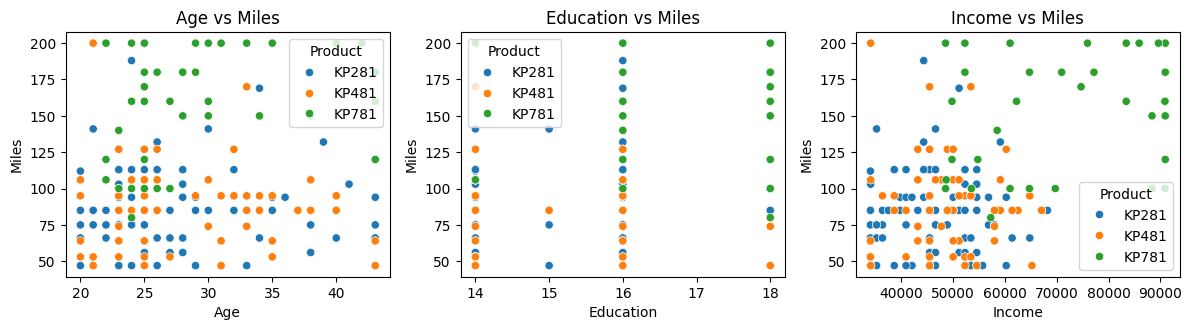

In [20]:
# Selecting only continuous variables
continuous_vars = ['Age', 'Education', 'Income']

# Plot boxplots for continuous variables to detect outliers
plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x = var, y = 'Miles', hue = 'Product')
    plt.title(f'{var} vs Miles')
plt.tight_layout()
plt.show()

In [21]:
pd.crosstab(index = df['Product'],columns = df['Gender'],margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Marginal Probability = count of product / Total no. of Product
Conditional Probability (A|B)= P(A and B)/P(B)

*   **KP281** is bought by **(80/180)*100 = 44.44 %** of people
*   **KP481** is bought by **(60/180)*100 = 33.33 %** of people
*   **KP481** is bought by **(40/180)*100 = 22.22 %** of people

*   Probability of **Female** purchasing a machine is : **76/180** = **0.42**
*   Probability of **Male** purchasing a macine is: **104/180** = **0.58**

* Probability of **purchasing KP281 given female** is **P(Purchasing KP281 | Female) = 40/76 = 0.52**
* Probability of **purchasing KP481 given female** is **P(Purchasing KP481 | Female) = 29/76 = 0.38**
* Probability of **purchasing KP781 given female** is **P(Purchasing KP781 | Female) = 7/76 = 0.09**
* Probability of **purchasing KP281 given male** is **P(Purchasing KP281 | Male) = 40/104 = 0.38**
* Probability of **purchasing K481 given male** is **P(Purchasing KP481 | Male) = 31/104 = 0.30**
* Probability of **purchasing KP781 given male** is **P(Purchasing KP781 | Male) = 33/104 = 0.31**

In [22]:
pd.crosstab(index = df['Product'],columns = df['Education'],margins = True)

Education,14,15,16,18,All
Product,,,,,
KP281,35,4,39,2,80
KP481,26,1,31,2,60
KP781,2,0,15,23,40
All,63,5,85,27,180


*   Probability of **14 years** Educated person buying a machine is **63/180 = 0.35**.
*   Probability of **15 years** Educated person buying a machine is **5/180 = 0.02**.
*   Probability of **16 years** Educated person buying a machine is **85/180 = 0.47**.
*   Probability of **18 years** Educated person buying a machine is **27/180 = 0.15**.

- Probability of **purchasing KP281 given education 14 years**: **P(Purchasing KP281 | Education 14) = 35/63 = 0.5556**
- Probability of **purchasing KP481 given education 14 years**: **P(Purchasing KP481 | Education 14) = 26/63 = 0.4127**
- Probability of **purchasing KP781 given education 14 years: P(Purchasing KP781 | Education 14) = 2/63 = 0.0317**
- Probability of **purchasing KP281 given education 15 years: P(Purchasing KP281 | Education 15) = 4/5 = 0.8000**
- Probability of **purchasing KP481 given education 15 years: P(Purchasing KP481 | Education 15) = 1/5 = 0.2000**
- Probability of **purchasing KP781 given education 15 years: P(Purchasing KP781 | Education 15) = 0**
- Probability of **purchasing KP281 given education 16 years: P(Purchasing KP281 | Education 16) = 39/85 = 0.4588**
- Probability of **purchasing KP481 given education 16 years: P(Purchasing KP481 | Education 16) = 31/85 = 0.3647**
- Probability of **purchasing KP781 given education 16 years: P(Purchasing KP781 | Education 16) = 15/85 = 0.1765**
- Probability of purchasing KP281 given education 18 years: P(Purchasing KP281 | Education 18) = 2/27 = 0.0741
- Probability of **purchasing KP481 given education 18 years: P(Purchasing KP481 | Education 18) = 2/27 = 0.0741**
- Probability of **purchasing KP781 given education 18 years: P(Purchasing KP781 | Education 18) = 23/27 = 0.8519**







In [23]:
pd.crosstab(index = df['Product'],columns = df['Age_cat'],margins = True)

Age_cat,10-20,20-30,30-40,40-50,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


*   Probability of person from **10-20** Age group buying a machine is **10/180 = 0.05**.
*    Probability of person from **20-30** Age group buying a machine is **110/180 = 0.61**.
*    Probability of person from **30-40** Age group buying a machine is **48/180 = 0.26**.
*    Probability of person from **40-50** Age group buying a machine is **12/180 = 0.06**.
- Probability of **purchasing KP281 given age 10-20: P(Purchasing KP281 | Age 10-20) = 6/10 = 0.6000**
- Probability of **purchasing KP481 given age 10-20: P(Purchasing KP481 | Age 10-20) = 4/10 = 0.4000**
- Probability of **purchasing KP781 given age 10-20: P(Purchasing KP781 | Age 10-20) = 0**
- Probability of **purchasing KP281 given age 20-30: P(Purchasing KP281 | Age 20-30) = 49/110 = 0.4455**
- Probability of **purchasing KP481 given age 20-30: P(Purchasing KP481 | Age 20-30) = 31/110 = 0.2818**
- Probability of **purchasing KP781 given age 20-30: P(Purchasing KP781 | Age 20-30) = 30/110 = 0.2727**
- Probability of **purchasing KP281 given age 30-40: P(Purchasing KP281 | Age 30-40) = 19/48 = 0.3958**
- Probability of **purchasing KP481 given age 30-40: P(Purchasing KP481 | Age 30-40) = 23/48 = 0.4792**
- Probability of **purchasing KP781 given age 30-40: P(Purchasing KP781 | Age 30-40) = 6/48 = 0.1250**
- Probability of **purchasing KP281 given age 40-50: P(Purchasing KP281 | Age 40-50) = 6/12 = 0.5000**
- Probability of **purchasing KP481 given age 40-50: P(Purchasing KP481 | Age 40-50) = 2/12 = 0.1667**
- Probability of **purchasing KP781 given age 40-50: P(Purchasing KP781 | Age 40-50) = 4/12 = 0.3333**


In [24]:
pd.crosstab(index = df['Product'],columns = df['MaritalStatus'],margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


*   Probability of person buying a machine who has a **partner** is : **107/180 = 0.59**
*   Probability of person buying a machine who is **single** is : **73/180 = 0.40**
Marital Status:
- Probability of **purchasing KP281 given partnered: P(Purchasing KP281 | Partnered) = 48/107 = 0.4486**
- Probability of **purchasing KP481 given partnered: P(Purchasing KP481 | Partnered) = 36/107 = 0.3364**
- Probability of** purchasing KP781 given partnered: P(Purchasing KP781 | Partnered) = 23/107 = 0.2150**
- Probability of **purchasing KP281 given single: P(Purchasing KP281 | Single) = 32/73 = 0.4384**
- Probability of **purchasing KP481 given single: P(Purchasing KP481 | Single) = 24/73 = 0.3288**
- Probability of **purchasing KP781 given single: P(Purchasing KP781 | Single) = 17/73 = 0.2329**



In [25]:
pd.crosstab(index = df['Product'],columns = df['Usage'],margins = True)

Usage,2,3,4,5,All
Product,,,,,
KP281,19,37,22,2,80
KP481,14,31,12,3,60
KP781,0,1,18,21,40
All,33,69,52,26,180


*   Probability of a person using a machine **2 times** a week is **33/180 = 0.183**
*   Probability of a person using a machine **3 times** a week is **69/180 = 0.383**
*   Probability of a person using a machine **4 times** a week is **52/180 = 0.289**
*   Probability of a person using a machine **5 times** a week is **26/180 = 0.144**





In [26]:
pd.crosstab(index = df['Product'],columns = df['Fitness'],margins = True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


*   Probability of a person buying a machine who rates himself **1 : 2/180 = 0.01**
*   Probability of a person buying a machine who rates himself **2 : 26/180 = 0.14**
*   Probability of a person buying a machine who rates himself **3 : 97/180 = 0.53**
*   Probability of a person buying a machine who rates himself **4 : 24/180 = 0.13**
*   Probability of a person buying a machine who rates himself **5 : 31/180 = 0.17**
- Probability of **purchasing KP281 given fitness 1: P(Purchasing KP281 | Fitness 1) = 1/2 = 0.5000**
- Probability of **purchasing KP481 given fitness 1: P(Purchasing KP481 | Fitness 1) = 1/2 = 0.5000**
- Probability of **purchasing KP781 given fitness 1: P(Purchasing KP781 | Fitness 1) = 0**
- Probability of **purchasing KP281 given fitness 2: P(Purchasing KP281 | Fitness 2) = 14/26 = 0.5385**
- Probability of **purchasing KP481 given fitness 2: P(Purchasing KP481 | Fitness 2) = 12/26 = 0.4615**
- Probability of **purchasing KP781 given fitness 2: P(Purchasing KP781 | Fitness 2) = 0**
- Probability of **purchasing KP281 given fitness 3: P(Purchasing KP281 | Fitness 3) = 54/97 = 0.5567**
- Probability of **purchasing KP481 given fitness 3: P(Purchasing KP481 | Fitness 3) = 39/97 = 0.4021**
- Probability of **purchasing KP781 given fitness 3: P(Purchasing KP781 | Fitness 3) = 4/97 = 0.0412**
- Probability of **purchasing KP281 given fitness 4: P(Purchasing KP281 | Fitness 4) = 9/24 = 0.3750**
- Probability of **purchasing KP481 given fitness 4: P(Purchasing KP481 | Fitness 4) = 8/24 = 0.3333**
- Probability of **purchasing KP781 given fitness 4: P(Purchasing KP781 | Fitness 4) = 7/24 = 0.2917**
- Probability of **purchasing KP281 given fitness 5: P(Purchasing KP281 | Fitness 5) = 2/31 = 0.0645**
- Probability of **purchasing KP481 given fitness 5: P(Purchasing KP481 | Fitness 5) = 0**
- Probability of **purchasing KP781 given fitness 5: P(Purchasing KP781 | Fitness 5) = 29/31 = 0.9355**







The df.corr() method computes the correlation between numerical columns only. Since your DataFrame contains categorical variables, we need to convert them into numerical values before computing the correlation matrix. So we are using pd.get_dummies method.

In [27]:
df_encoded = pd.get_dummies(df)
df_encoded

,Age,Education,Usage,Fitness,Income,Miles,Product_KP281,Product_KP481,Product_KP781,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single,Age_cat_10-20,Age_cat_20-30,Age_cat_30-40,Age_cat_40-50
0,20.00,14,3,4,34053.15,112,True,False,False,False,True,False,True,True,False,False,False
1,20.00,15,2,3,34053.15,75,True,False,False,False,True,False,True,True,False,False,False
2,20.00,14,4,3,34053.15,66,True,False,False,True,False,True,False,True,False,False,False
3,20.00,14,3,3,34053.15,85,True,False,False,False,True,False,True,True,False,False,False
4,20.00,14,4,2,35247.00,47,True,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40.00,18,5,5,83416.00,200,False,False,True,False,True,False,True,False,False,True,False
176,42.00,18,5,4,89641.00,200,False,False,True,False,True,False,True,False,False,False,True
177,43.05,16,5,5,90886.00,160,False,False,True,False,True,False,True,False,False,False,True
178,43.05,18,4,5,90948.25,120,False,False,True,False,True,True,False,False,False,False,True


In [28]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles,Product_KP281,Product_KP481,Product_KP781,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single,Age_cat_10-20,Age_cat_20-30,Age_cat_30-40,Age_cat_40-50
Age,1.000000,0.301971,0.015180,0.059047,0.514362,0.029636,-0.029760,0.017630,0.015579,-0.027288,0.027288,0.184322,-0.184322,-0.326027,-0.683491,0.590609,0.588122
Education,0.301971,1.000000,0.412484,0.419020,0.628597,0.377294,-0.294507,-0.202459,0.581570,-0.128270,0.128270,0.081408,-0.081408,-0.262891,-0.083438,0.125177,0.182561
Usage,0.015180,0.412484,1.000000,0.656798,0.478615,0.769234,-0.290292,-0.245073,0.624852,-0.213818,0.213818,-0.038351,0.038351,-0.101156,0.127863,-0.105385,0.029830
Fitness,0.059047,0.419020,0.656798,1.000000,0.535945,0.822393,-0.326090,-0.304015,0.734472,-0.254609,0.254609,-0.050751,0.050751,-0.078912,0.068860,-0.064816,0.052795
Income,0.514362,0.628597,0.478615,0.535945,1.000000,0.537297,-0.399793,-0.203157,0.708203,-0.203453,0.203453,0.139382,-0.139382,-0.296289,-0.184508,0.209267,0.261680
Miles,0.029636,0.377294,0.769234,0.822393,0.537297,1.000000,-0.371555,-0.205850,0.677504,-0.227791,0.227791,-0.020019,0.020019,-0.135665,0.106789,-0.050046,0.004601
Product_KP281,-0.029760,-0.294507,-0.290292,-0.326090,-0.399793,-0.371555,1.000000,-0.632456,-0.478091,0.140848,-0.140848,0.010120,-0.010120,0.075926,0.002548,-0.058992,0.029881
Product_KP481,0.017630,-0.202459,-0.245073,-0.304015,-0.203157,-0.205850,-0.632456,1.000000,-0.377964,0.087489,-0.087489,0.008001,-0.008001,0.034300,-0.136990,0.186551,-0.094491
Product_KP781,0.015579,0.581570,0.624852,0.734472,0.708203,0.677504,-0.478091,-0.377964,1.000000,-0.267549,0.267549,-0.021168,0.021168,-0.129641,0.152286,-0.141019,0.071429
Gender_Female,-0.027288,-0.128270,-0.213818,-0.254609,-0.203453,-0.227791,0.140848,0.087489,-0.267549,1.000000,-1.000000,0.018836,-0.018836,-0.060017,0.035891,0.044088,-0.093191


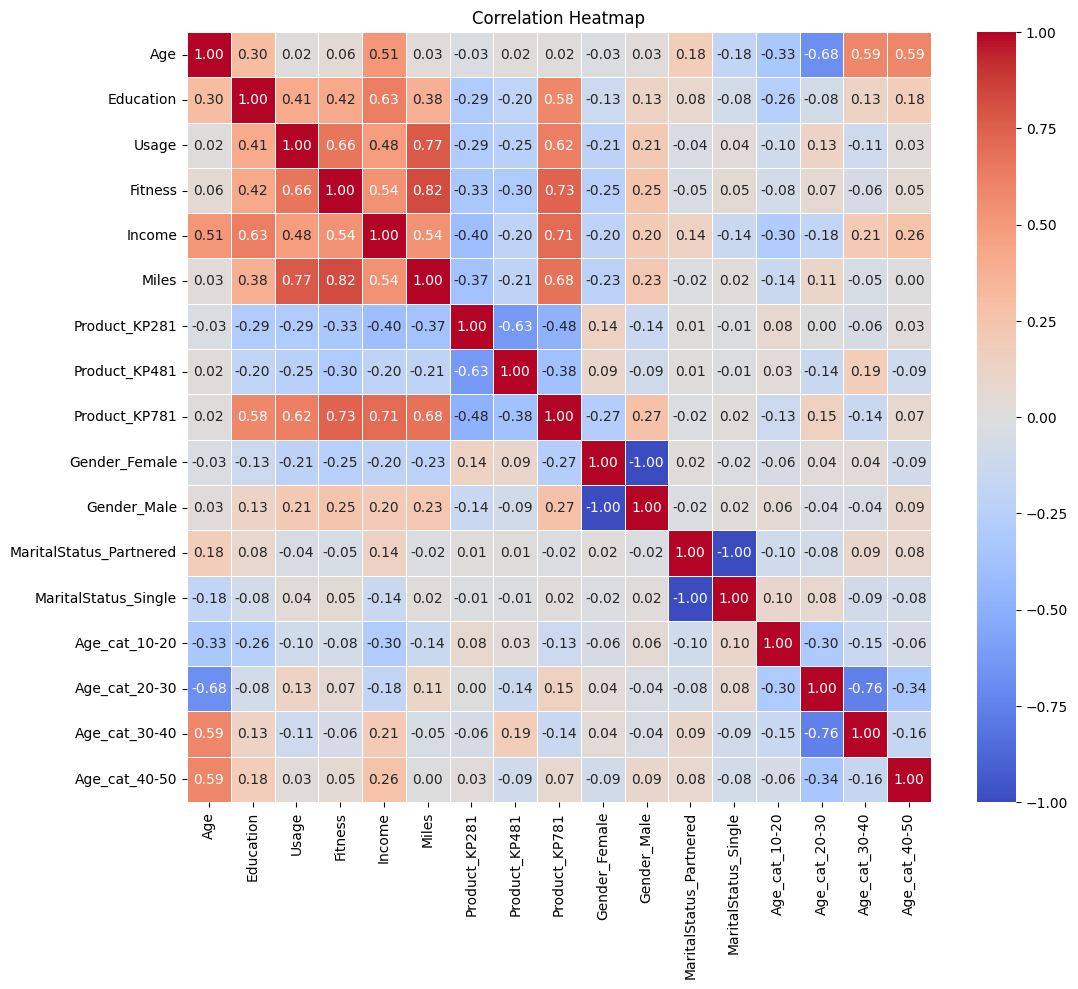

In [29]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

---
1. **Age and Education:**
   - As people get older, they tend to have higher levels of education. This makes sense because many people pursue more education as they grow older and gain more experience.

2. **Usage and Fitness:**
   - People who use the treadmill more often also tend to rate themselves as being more fit. This suggests that using the treadmill regularly might help people improve their fitness levels.

3. **Income and Education:**
   - People with higher levels of education often have higher incomes. This is because education can lead to better job opportunities and higher-paying careers.

4. **Age and Fitness:**
   - Older individuals tend to rate themselves slightly higher in terms of fitness compared to younger individuals. This might be because older people have more experience and confidence in their physical abilities.

5. **Product Preferences:**
   - Certain factors like age, income, and fitness level may influence which treadmill model people prefer. For example, younger people might prefer a simpler, more affordable treadmill (like KP281), while wealthier individuals might opt for a more advanced model (like KP781). Understanding these preferences can help companies tailor their marketing strategies to different customer segments.


# CONCLUSION
---

**Customer Profiling:**

1. **KP281 Treadmill:**
   - **Age Group:** Predominantly purchased by individuals aged between 20 to 30 years old.
   - **Gender:** No significant gender preference observed; purchased by both males and females.
   - **Income Group:** Attracts customers across various income levels, particularly those with lower to moderate incomes.
   - **Fitness Rating:** Preferred by individuals who rate themselves as moderately fit (3 out of 5).
   - **Usage Frequency:** Typically used 2-4 times a week.
   - **Miles Run:** Most commonly purchased by individuals running below 125 miles per week.

2. **KP481 Treadmill:**
   - **Age Group:** No specific age group preference; purchased by individuals across various age ranges.
   - **Gender:** Balanced purchase distribution among both genders.
   - **Income Group:** Attracts customers with moderate incomes.
   - **Fitness Rating:** Preferred by individuals with moderate fitness levels (rated as 3 out of 5).
   - **Usage Frequency:** Typically used 2-4 times a week.
   - **Miles Run:** Commonly purchased by individuals running below 125 miles per week.

3. **KP781 Treadmill:**
   - **Age Group:** Preferred by individuals aged between 20 to 30 years old with higher incomes, as well as by individuals of all ages with incomes above 70k.
   - **Gender:** Slightly favored by males, with fewer female purchases.
   - **Income Group:** Attracts customers with higher incomes, especially those above 70k.
   - **Fitness Rating:** Preferred by individuals who rate themselves as highly fit (5 out of 5).
   - **Usage Frequency:** Typically used 4-5 times a week.
   - **Miles Run:** Primarily purchased by individuals running above 125 miles per week.

**Recommendations:**

1. **For KP281:**
   - Target marketing efforts towards the 20-30 age group, emphasizing the affordability and basic features of the KP281 treadmill.
   - Create tailored workout programs and incentives to encourage regular usage among customers with moderate fitness levels.

2. **For KP481:**
   - Highlight the versatility and durability of KP481 to appeal to a wide range of age groups and income levels.
   - Offer financing options or promotional discounts to attract customers with moderate incomes who seek a reliable mid-level treadmill option.

3. **For KP781:**
   - Position KP781 as a premium option for serious athletes and fitness enthusiasts, focusing on its advanced features and high-performance capabilities.
   - Provide personalized consultations and demonstrations for potential buyers, showcasing the tailored workout programs and advanced tracking metrics of the KP781 treadmill.

These recommendations align with the observed customer preferences and behaviors, ensuring that each treadmill model is marketed effectively to its target audience.

---
